In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import mediapipe as mp
from sklearn.svm import SVC
import arabic_reshaper
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from PIL import ImageFont, ImageDraw, Image
import arabic_reshaper
from bidi.algorithm import get_display
import pickle


In [ ]:
# import os
# import cv2
# import numpy as np
# import albumentations as A
# from albumentations.augmentations.transforms import *
# from albumentations.pytorch import ToTensorV2
# from mediapipe import solutions

# from PIL import Image

# folder_path = r"D:\arabic_dataset\ARSL-No-BackGround-V2"
# target_count = 1000
# image_size = (224, 224)

# mp_hands = solutions.hands
# hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

# # Define augmentation pipeline
# augment = A.Compose([
#     A.Rotate(limit=20, p=0.5),
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.3),
#     A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5),
#     A.RGBShift(p=0.2),
#     A.MotionBlur(p=0.1),
# ])

# for class_name in os.listdir(folder_path):
#     class_dir = os.path.join(folder_path, class_name)
#     if not os.path.isdir(class_dir):
#         continue

#     images = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
#     current_count = len(images)

#     if current_count >= target_count:
#         continue
#     else:
#         needed = target_count - current_count
#         print(f"{class_name}: augmenting {needed} images...")

#     i = 0
#     for img_name in images:
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#         results = hands.process(img_rgb)
#         if not results.multi_hand_landmarks:
#             continue  # Skip if no hand detected

#         for _ in range(5):  
#             augmented = augment(image=img_rgb)
#             aug_img = augmented['image']
#             aug_img_bgr = cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)
#             save_path = os.path.join(class_dir, f"aug_{i}_{img_name}")
#             cv2.imwrite(save_path, aug_img_bgr)
#             i += 1

#             if i >= needed:
#                 break
#         if i >= needed:
#             break

Ain: augmenting 28 images...
Dad: augmenting 35 images...
Dal: augmenting 60 images...
Feh: augmenting 16 images...
Ghain: augmenting 44 images...
Hah: augmenting 39 images...
Heh: augmenting 13 images...
Jeem: augmenting 73 images...
Khah: augmenting 39 images...
Laa: augmenting 4 images...
Lam: augmenting 21 images...
Meem: augmenting 18 images...
Noon: augmenting 33 images...
Qaf: augmenting 52 images...
Reh: augmenting 58 images...
Sad: augmenting 29 images...
Tah: augmenting 53 images...
Teh_Marbuta: augmenting 34 images...
Thal: augmenting 103 images...
Waw: augmenting 36 images...
Yeh: augmenting 29 images...
Zah: augmenting 51 images...
Zain: augmenting 88 images...


In [ ]:
# import cv2
# import os
# import mediapipe as mp
# import numpy as np

# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

# folder_path = r"D:\arabic_datases_cnn\ARSL-No-BackGround-V2"
# save_path = r"D:\arabic_datases_cnn\mediapipe"

# for dir_ in os.listdir(folder_path):
#     dir_path = os.path.join(folder_path, dir_)
#     save_dir = os.path.join(save_path, dir_)
#     os.makedirs(save_dir, exist_ok=True)

#     for img_name in os.listdir(dir_path):
#         img_path = os.path.join(dir_path, img_name)
#         img = cv2.imread(img_path)

#         if img is None:
#             continue

#         img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img_rgb = cv2.resize(img_rgb, (224, 224))
#         img_rgb = cv2.flip(img_rgb, 1)

#         results = hands.process(img_rgb)

#         if results.multi_hand_landmarks:
#                 save_img_path = os.path.join(save_dir, img_name)
#                 cv2.imwrite(save_img_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

In [ ]:
# import random

# folder_path_2 = r"D:\arabic_datases_cnn\mediapipe - Copy"

# target = 300

# for class_name in os.listdir(folder_path_2):
#     class_dir = os.path.join(folder_path_2, class_name)
#     if not os.path.isdir(class_dir):
#         continue
        
#     images = []
#     for img_name in os.listdir(class_dir):
#         if img_name.endswith(('.jpg', '.jpeg', '.png')):
#             images.append(os.path.join(class_dir, img_name))
#     if len(images) > target:
#         images_to_remove = random.sample(images, len(images) - target)
#         for img_path in images_to_remove:
#             os.remove(img_path)
#             print(f"Removed {img_path}")

Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\aug_696_Ain_53.jpg
Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\aug_896_aug_17_Ain_101.jpg
Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\aug_196_Ain_152.jpg
Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\Ain_197.jpg
Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\aug_395_Ain_200.jpg
Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\aug_938_aug_24_Ain_103.jpg
Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\aug_281_Ain_175.jpeg
Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\Ain_4.jpg
Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\Ain_128.jpeg
Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\aug_5_Ain_10.jpeg
Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\aug_469_Ain_215.jpg
Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\aug_817_Ain_89.jpg
Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\Ain_112.jpg
Removed D:\arabic_datases_cnn\mediapipe - Copy\Ain\Ain_184.jpg
Removed D:\arabic_datases_cnn\mediap

In [2]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

folder_path = r"D:\arabic_datases_cnn\mediapipe - Copy"

data = []
labels = []
for dir_ in os.listdir(folder_path):
    for img_path in os.listdir(os.path.join(folder_path, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(folder_path, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_rgb = cv2.resize(img_rgb, (224, 224))
        img_rgb = cv2.flip(img_rgb, 1)
        

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            data.append(data_aux)
            labels.append(dir_)
            
data = np.array(data)
labels = np.array(labels)
y_series = pd.Series(labels)
print(y_series.value_counts())

Theh           307
Alef           306
Beh            304
Teh            304
Jeem           302
Sheen          302
Seen           302
Lam            301
Al             301
Reh            301
Ghain          300
Dal            300
Dad            300
Sad            300
Yeh            299
Zah            299
Kaf            299
Teh_Marbuta    299
Zain           299
Laa            298
Tah            297
Meem           297
Heh            297
Feh            297
Qaf            296
Khah           296
Thal           296
Hah            296
Noon           295
Ain            292
Waw            289
Name: count, dtype: int64


In [3]:
print("Data shape:", data.shape)
print("Data shape:", len(labels))

Data shape: (9271, 42)
Data shape: 9271


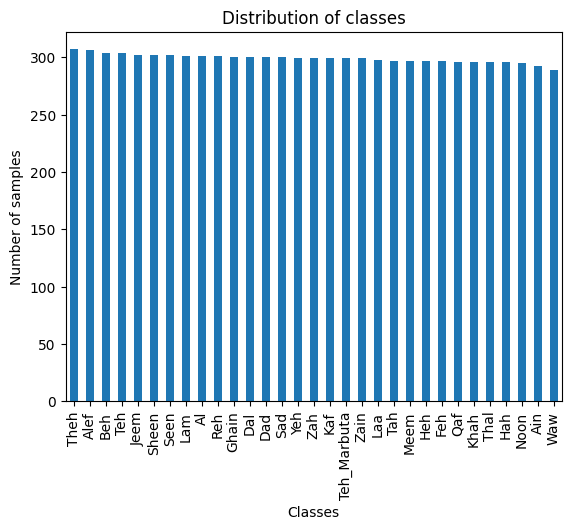

In [4]:
y_series.value_counts().plot(kind='bar')
plt.title("Distribution of classes")
plt.xlabel("Classes")
plt.ylabel("Number of samples")
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True, stratify=labels)

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_train = knn.predict(x_train)
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

Train Accuracy:  0.9509169363538296
              precision    recall  f1-score   support

         Ain       0.86      0.95      0.90        58
          Al       0.98      0.95      0.97        60
        Alef       1.00      0.95      0.97        61
         Beh       0.90      0.90      0.90        61
         Dad       0.93      0.88      0.91        60
         Dal       0.76      0.90      0.82        60
         Feh       0.82      0.86      0.84        59
       Ghain       0.91      1.00      0.95        60
         Hah       0.80      0.76      0.78        59
         Heh       0.92      0.95      0.93        59
        Jeem       0.95      0.90      0.92        61
         Kaf       0.90      0.92      0.91        60
        Khah       0.92      0.93      0.92        59
         Laa       0.98      0.95      0.97        60
         Lam       0.97      0.95      0.96        60
        Meem       0.79      0.95      0.86        59
        Noon       0.90      0.92      0.91  

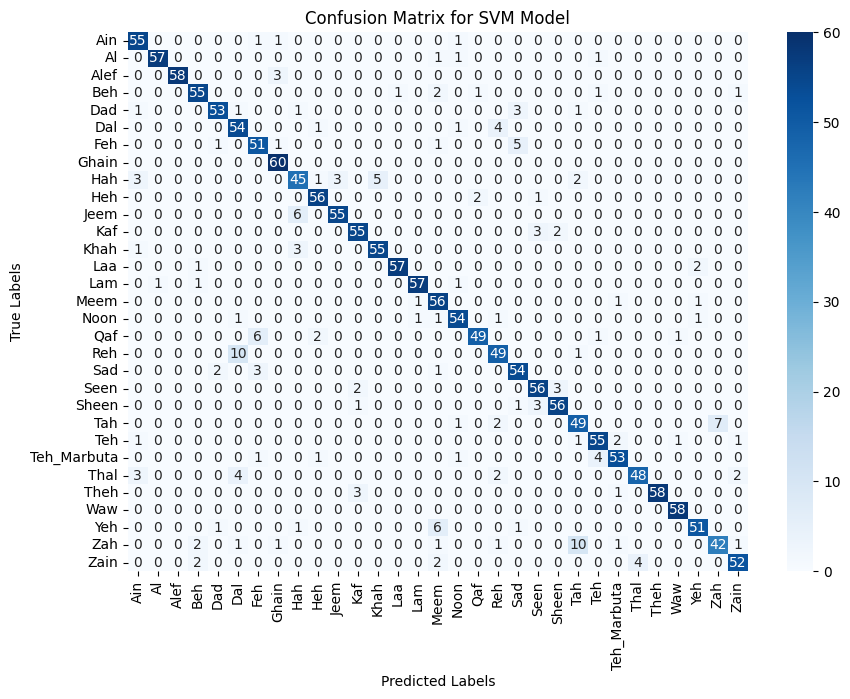

In [7]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [7]:
svm = SVC(kernel='rbf', C=9.0,random_state=42)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
y_pred_train_svm = svm.predict(x_train)
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train_svm))
print(classification_report(y_test, y_pred_svm))

Train Accuracy:  0.9785598705501618
              precision    recall  f1-score   support

         Ain       0.92      1.00      0.96        58
          Al       1.00      0.97      0.98        60
        Alef       1.00      0.98      0.99        61
         Beh       0.95      0.93      0.94        61
         Dad       1.00      0.90      0.95        60
         Dal       0.83      0.95      0.88        60
         Feh       0.89      0.97      0.93        59
       Ghain       0.95      1.00      0.98        60
         Hah       0.93      0.88      0.90        59
         Heh       0.97      1.00      0.98        59
        Jeem       0.97      0.93      0.95        61
         Kaf       0.98      0.95      0.97        60
        Khah       0.95      1.00      0.98        59
         Laa       0.95      0.98      0.97        60
         Lam       0.98      0.98      0.98        60
        Meem       0.93      0.97      0.95        59
        Noon       0.98      0.95      0.97  

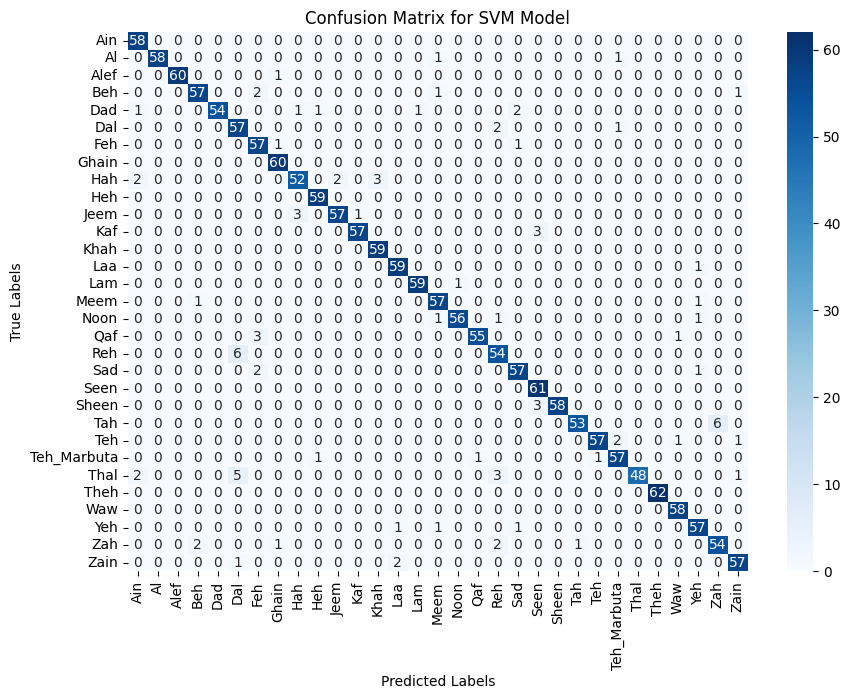

In [9]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

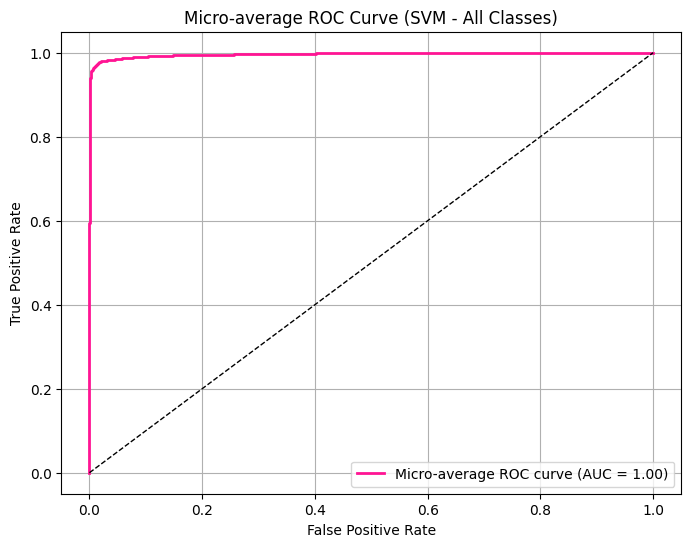

In [10]:
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc


le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
n_classes = len(le.classes_)
y_train_bin = label_binarize(y_train_encoded, classes=np.arange(n_classes))
y_test_bin = label_binarize(y_test_encoded, classes=np.arange(n_classes))

svm = OneVsRestClassifier(SVC(kernel='rbf', C=9.0, probability=True, random_state=42))
svm.fit(x_train, y_train_bin)
y_score = svm.predict_proba(x_test)

fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)


plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, label=f"Micro-average ROC curve (AUC = {roc_auc_micro:.2f})", color='deeppink', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-average ROC Curve (SVM - All Classes)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [9]:
import time

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)

model = pickle.load(open('rf_model.p', 'rb'))

labels_dict = {
    'Ain':'ع','Beh':'ب','Alef':'أ','Al':'ال','Dad':'ض','Dal':'د','Feh':'ف','Ghain':'غ','Hah':'ح',
    'Heh':'ه','Jeem':'ج','Kaf':'ك','Khah':'خ','Laa':'لا','Lam':'ل','Meem':'م','Noon':'ن','Qaf':'ق',
    'Reh':'ر','Sad':'ص','Seen':'س','Sheen':'ش','Tah':'ط','Teh':'ت','Teh_Marbuta':'ة','Thal':'ذ','Theh':'ث','Waw':'و','Yeh':'ي','Zah':'ظ','Zain':'ز'
}

cap = cv2.VideoCapture(0)

font_path = "arial.ttf"

sentences = ""
last_char = ""
last_added_time = time.time()
add_interval = 3


while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1) 
    H, W, _ = frame.shape
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame, hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style()
            )

            x_ = []
            y_ = []
            data_aux = []

            for lm in hand_landmarks.landmark:
                x_.append(lm.x)
                y_.append(lm.y)

            for lm in hand_landmarks.landmark:
                data_aux.append(lm.x - min(x_))
                data_aux.append(lm.y - min(y_))

            x1 = int(min(x_) * W) - 20
            y1 = int(min(y_) * H) - 20
            x2 = int(max(x_) * W) + 20
            y2 = int(max(y_) * H) + 20

        try:
            prediction = svm.predict([np.array(data_aux)])
            current_char = labels_dict.get(prediction[0], '?')
            
            reshaped_text = arabic_reshaper.reshape(current_char)
            bidi_text = get_display(reshaped_text)
            current_time = time.time()
            if current_time - last_added_time > add_interval:
                sentences += current_char
                last_added_time = current_time
            reshaped_sentence = arabic_reshaper.reshape(sentences)
            bidi_sentence = get_display(reshaped_sentence)

            pil_img = Image.fromarray(frame)
            draw = ImageDraw.Draw(pil_img)
            font = ImageFont.truetype(font_path, 48)

            draw.text((x1, y1 - 50), reshaped_text, font=font, fill=(255, 0, 0))

            text_width = font.getbbox(bidi_sentence)[2]
            x_pos = W - text_width - 50
            y_pos = 420

            draw.text((x_pos, y_pos), bidi_sentence, font=font, fill=(255, 255, 255))

            frame = np.array(pil_img)

            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
        except:
            pass
            
    cv2.imshow("Hand Detection", frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord(' '):
        sentences += " "
    elif key == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

c:\Users\Samer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Samer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
